<a href="https://colab.research.google.com/github/davro76/Data-Mining-Process/blob/main/Copie_de_NBA_Rookie_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Group**

---


Michael Strohmeier<br>
Emily Jy<br>
Rodney Davermann

In [ ]:
#Import your Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
%matplotlib inline

In [ ]:
url = "https://raw.githubusercontent.com/fenago/datasets/main/nba_logreg_original.csv"
df = pd.read_csv(url)

df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


Notes
This session covers data collection and some procedures of data preparation.

Commands, functions, and methods:

!wget - Linux shell command for downloading data
pd.read.csv() - read csv files
df.head() - take a look of the dataframe
df.head().T - take a look of the transposed dataframe
df.columns - retrieve column names of a dataframe
df.columns.str.lower() - lowercase all the letters
df.columns.str.replace(' ', '_') - replace the space separator
df.dtypes - retrieve data types of all series
df.index - retrive indices of a dataframe
pd.to_numeric() - convert a series values to numerical values. The errors=coerce argument allows making the transformation despite some encountered errors.
df.fillna() - replace NAs with some value
(df.x == "yes").astype(int) - convert x series of yes-no values to numerical values.
df['Weight'] = df['Weight'].astype(int) - this takes a single column of data and converts the data type

In [ ]:
len(df)

1340

In [ ]:
df.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [ ]:
df.shape

(1340, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

In [ ]:
df

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


In [ ]:
df.nunique()

Name           1294
GP               70
MIN             325
PTS             191
FGM              87
FGA             159
FG%             284
3P Made          23
3PA              54
3P%             254
FTM              59
FTA              76
FT%             383
OREB             44
DREB             74
REB             101
AST              77
STL              26
BLK              28
TOV              41
TARGET_5Yrs       2
dtype: int64

In [ ]:
df.TARGET_5Yrs.unique()

array([0., 1.])

In [ ]:
df.corr()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
GP,1.000000,0.590240,0.538471,0.542724,0.516625,0.296289,0.107423,0.098772,0.038209,0.482123,0.479487,0.196299,0.401136,0.466840,0.460406,0.372749,0.451137,0.276498,0.518167,0.396833
MIN,0.590240,1.000000,0.911822,0.903060,0.910247,0.203901,0.389920,0.403258,0.165997,0.791000,0.779609,0.239878,0.573062,0.745513,0.709707,0.629015,0.757034,0.399088,0.826500,0.317805
PTS,0.538471,0.911822,1.000000,0.990834,0.979733,0.255333,0.346682,0.356751,0.151072,0.896297,0.880703,0.258931,0.575106,0.693934,0.676849,0.552338,0.675341,0.387043,0.850366,0.315981
FGM,0.542724,0.903060,0.990834,1.000000,0.980050,0.291693,0.289007,0.299057,0.119493,0.848019,0.840408,0.223566,0.596687,0.703278,0.691186,0.532534,0.662640,0.398125,0.834352,0.317594
FGA,0.516625,0.910247,0.979733,0.980050,1.000000,0.129798,0.390253,0.413560,0.197160,0.826616,0.805559,0.269614,0.504212,0.640123,0.614328,0.589818,0.690168,0.322184,0.845989,0.292660
FG%,0.296289,0.203901,0.255333,0.291693,0.129798,1.000000,-0.294471,-0.350658,-0.330690,0.245776,0.300154,-0.161183,0.511367,0.410555,0.465423,-0.108797,0.056658,0.391626,0.121806,0.227134
3P Made,0.107423,0.389920,0.346682,0.289007,0.390253,-0.294471,1.000000,0.982616,0.589855,0.158472,0.095396,0.314355,-0.219010,0.016570,-0.072503,0.376604,0.306908,-0.158535,0.258369,0.036619
3PA,0.098772,0.403258,0.356751,0.299057,0.413560,-0.350658,0.982616,1.000000,0.582337,0.173533,0.108388,0.323612,-0.231897,0.011226,-0.080939,0.410531,0.338631,-0.172150,0.283925,0.018110
3P%,0.038209,0.165997,0.151072,0.119493,0.197160,-0.330690,0.589855,0.582337,1.000000,0.030320,-0.032333,0.326372,-0.288759,-0.122949,-0.191071,0.262120,0.194329,-0.242274,0.108277,-0.003411
FTM,0.482123,0.791000,0.896297,0.848019,0.826616,0.245776,0.158472,0.173533,0.030320,1.000000,0.980505,0.257818,0.583865,0.653823,0.653833,0.476214,0.600158,0.407466,0.804990,0.296841


In [ ]:
# Basic Data Cleaning
df.columns = df.columns.str.lower().str.replace(' ', '_') # A
 
string_columns = list(df.dtypes[df.dtypes == 'object'].index) # B
 
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_') # C

In [ ]:
df.sample(7)

,name,gp,min,pts,fgm,fga,fg%,3p_made,3pa,3p%,...,fta,ft%,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
133,stacey_king,82,21.7,8.9,3.3,6.5,50.4,0.0,0.0,0.0,...,3.3,72.7,2.1,2.6,4.7,1.1,0.5,0.7,1.4,1.0
125,sam_mitchell,80,30.2,12.7,4.7,10.4,44.6,0.0,0.1,0.0,...,4.4,76.8,2.3,3.5,5.8,1.1,0.8,0.7,1.2,1.0
168,charles_smith,34,8.6,3.5,1.4,3.7,39.2,0.4,1.4,31.9,...,0.3,54.5,0.4,0.4,0.8,0.6,0.3,0.2,0.8,1.0
776,kevin_durant,80,34.6,20.3,7.3,17.1,43.0,0.7,2.6,28.8,...,5.6,87.3,0.9,3.5,4.3,2.4,1.0,0.9,2.9,1.0
378,eddie_lee_wilkins,54,17.0,5.5,2.1,4.3,49.8,0.0,0.0,0.0,...,2.3,54.1,1.6,3.3,4.9,0.3,0.4,0.3,1.2,1.0
1284,rodney_rogers,79,17.8,8.1,3.0,6.9,43.9,0.4,1.2,38.0,...,2.4,67.2,1.1,1.7,2.9,1.3,0.8,0.6,1.7,1.0
1038,khalid_el-amin,50,18.7,6.3,2.3,6.2,37.0,0.6,1.7,33.3,...,1.4,77.8,0.4,1.2,1.6,2.9,1.0,0.0,1.1,0.0


In [ ]:
# change 5 year to int
df["target_5yrs"] = df["target_5yrs"].astype('int')

In [ ]:
"""for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)
df = df[df.status != 0]   # Also make sure to treat the target variable"""

"for c in ['income', 'assets', 'debt']:\n    df[c] = df[c].replace(to_replace=99999999, value=np.nan)\ndf = df[df.status != 0]   # Also make sure to treat the target variable"

In [ ]:
"""df.status.unique()"""

'df.status.unique()'

In [ ]:
"""df['status'].unique()"""
df.columns

Index(['name', 'gp', 'min', 'pts', 'fgm', 'fga', 'fg%', '3p_made', '3pa',
       '3p%', 'ftm', 'fta', 'ft%', 'oreb', 'dreb', 'reb', 'ast', 'stl', 'blk',
       'tov', 'target_5yrs'],
      dtype='object')

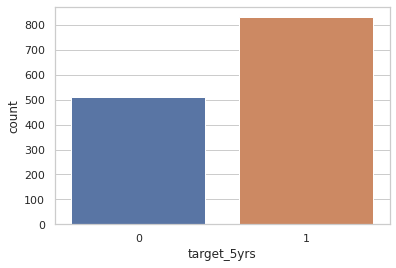

In [ ]:
"""# Replace with your target variable --- df.YOUR_TARGET_VARIABLE  
# Look for major data imbalances
# Also replace your X label
# REPLACE YOUR TARGET VARIABLE
plt.figure(figsize=(6, 4))

sns.histplot(df.status, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('status')
plt.title('status')

plt.show()"""
import seaborn as sns
sns.set_theme(style="whitegrid")

# df = sns.load_dataset("titanic")
sns.countplot(x=df["target_5yrs"])

In [ ]:
# Check for nulls --- you do NOT want nulls when you train
df.isnull().sum()

name            0
gp              0
min             0
pts             0
fgm             0
fga             0
fg%             0
3p_made         0
3pa             0
3p%            11
ftm             0
fta             0
ft%             0
oreb            0
dreb            0
reb             0
ast             0
stl             0
blk             0
tov             0
target_5yrs     0
dtype: int64

In [ ]:
df[df["3p%"].isnull()]

,name,gp,min,pts,fgm,fga,fg%,3p_made,3pa,3p%,...,fta,ft%,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
338,ken_johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0
339,ken_johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0
340,pete_williams,53,10.8,2.8,1.3,2.1,60.4,0.0,0.0,NaN,...,0.8,42.5,0.9,1.9,2.8,0.3,0.4,0.4,0.4,0
358,melvin_turpin,79,24.7,10.6,4.6,9.0,51.1,0.0,0.0,NaN,...,1.8,78.4,2.0,3.8,5.7,0.5,0.5,1.1,1.5,1
386,jim_petersen,60,11.9,3.2,1.2,2.4,48.6,0.0,0.0,NaN,...,1.1,75.8,0.7,1.7,2.5,0.5,0.2,0.5,1.2,1
397,tom_scheffler,39,6.9,1.3,0.5,1.3,41.2,0.0,0.0,NaN,...,0.5,50.0,0.5,1.5,1.9,0.3,0.2,0.3,0.4,0
507,sam_williams,59,18.2,6.1,2.6,4.7,55.6,0.0,0.0,NaN,...,1.5,55.1,1.5,3.7,5.2,0.6,0.8,1.3,1.1,0
509,kurt_nimphius,63,17.2,5.3,2.2,4.7,46.1,0.0,0.0,NaN,...,1.7,58.3,1.5,3.2,4.7,1.0,0.3,1.3,0.9,1
510,pete_verhoeven,71,17.0,4.9,2.1,4.2,50.3,0.0,0.0,NaN,...,1.0,70.8,1.5,2.1,3.6,0.7,0.6,0.3,0.8,1
521,jim_smith,72,11.9,2.9,1.2,2.3,50.9,0.0,0.0,NaN,...,1.2,45.9,1.0,1.5,2.5,0.6,0.3,0.7,0.7,0


In [ ]:
"""df.status.value_counts() """

'df.status.value_counts() '

In [ ]:
#
#
#
# drop columns that our model doesnt need
#
#
#
drop_columns = ['fg%', '3p%', 'ft%', 'name']

df = df.drop(drop_columns, axis=1)

df.columns

# find points per minute

Index(['gp', 'min', 'pts', 'fgm', 'fga', '3p_made', '3pa', 'ftm', 'fta',
       'oreb', 'dreb', 'reb', 'ast', 'stl', 'blk', 'tov', 'target_5yrs'],
      dtype='object')

In [ ]:
#delete columns --- this may or may NOT be needed.  As before - skip if you don't need it
# You will encounter times where you will want to delete columns.  This is how you do that.
# df = df.drop(['x5_latitude', 'x6_longitude', 'x1_transaction_date'], axis=1)
# df

In [ ]:
# Split the data into test, train, validation sets... 80/20
from sklearn.model_selection import train_test_split

# This gives the 80/20 train test split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)

len(df_train_full), len(df_test)
# Replace nulls with 0's - these are pandas dataframes
df_train_full = df_train_full.fillna(0)

df_test = df_test.fillna(0)
len(df_train_full),len(df_test)

(1072, 268)

In [ ]:
#Split the y out into train/test/splits... these are numpy ndarrays ... msrp is your target variables
# Replace with your target variable!!!  
y_train = (df_train_full.target_5yrs).values
y_test = (df_test.target_5yrs).values
del df_train_full['target_5yrs']
del df_test['target_5yrs']

In [ ]:
len(y_train), len(y_test)

(1072, 268)

In [ ]:
# Convert these data frames into a LIST of DICTIONARIES (each element in the list is a dictionary (the record))
dict_train = df_train_full.to_dict(orient='records')
dict_test = df_test.to_dict(orient='records')

type(dict_train)

list

In [ ]:
# Convert the LIST OF DICTIONARIES into a Feature Matrix (does all of the encoding)
from sklearn.feature_extraction import DictVectorizer
 
dv = DictVectorizer(sparse=False)
 
X_train = dv.fit_transform(dict_train)
X_test = dv.transform(dict_test)
features = dv.get_feature_names()  #Features as they exist in the Vectorized Dictionary (this is an ndarray)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_test.shape

(268, 16)

LR: 0.748365 (0.041319)
Score for each of the 10 K-fold tests:  [0.80050965 0.75436641 0.75384615 0.7534749  0.80543237 0.6921147
 0.70277778 0.69416667 0.7290724  0.79788839]
LogisticRegression(solver='liblinear')
	Training time: 0.021s
	Prediction time: 0.235s

LDA: 0.749205 (0.034932)
Score for each of the 10 K-fold tests:  [0.78776847 0.74953549 0.75311355 0.74073359 0.80691057 0.7
 0.71468254 0.70291667 0.74792609 0.78846154]
LinearDiscriminantAnalysis()
	Training time: 0.125s
	Prediction time: 0.295s

KNN: 0.649200 (0.045597)
Score for each of the 10 K-fold tests:  [0.67619221 0.61594203 0.60641026 0.67586873 0.72394678 0.60501792
 0.65992063 0.71791667 0.5953997  0.61538462]
KNeighborsClassifier()
	Training time: 0.009s
	Prediction time: 0.188s

CART: 0.565260 (0.037474)
Score for each of the 10 K-fold tests:  [0.57571897 0.53251579 0.62454212 0.59305019 0.59608278 0.53566308
 0.49126984 0.53916667 0.58484163 0.57975113]
DecisionTreeClassifier()
	Training time: 0.041s
	Predictio

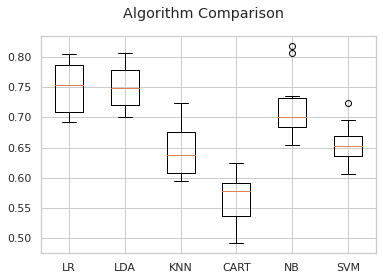

In [ ]:
# Compare Algorithms with the Algorithm Harness
# https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
from sklearn.metrics import roc_auc_score
from time import time
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'
# you can also use other metrics to score your models: https://iqcode.com/code/python/sklearn-cross-val-score-scoring-options
for name, model in models:
    start = time()
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    model.fit(X_train, y_train)
    train_time = time() - start
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    predict_time = time()-start 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    #y_pred = model.predict_proba(X_train)[:, 1]
    #auc = roc_auc_score(y_train, y_pred)
    print(msg)
    print("Score for each of the 10 K-fold tests: ",cv_results)
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    #y_pred = model.predict(X_test)
    #print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print()
    
    
    
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Pick a couple of models to go further

In [ ]:
# Let's assume that the decision tree is the one we want to explore
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# This will give you the list of Hyperparameters of your model
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
# You have converted the dataframe into a list of dictionaries - validate the headers
type(X_train)
type(dv.get_feature_names())
type(dt.feature_importances_)
dv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['3p_made',
 '3pa',
 'ast',
 'blk',
 'dreb',
 'fga',
 'fgm',
 'fta',
 'ftm',
 'gp',
 'min',
 'oreb',
 'pts',
 'reb',
 'stl',
 'tov']

In [ ]:
# These are the model properties.  You can call all of these
def get_properties(model):   
  return [i for i in model.__dict__ if i.endswith('_')] 
get_properties(dt)

['n_features_in_',
 'n_outputs_',
 'classes_',
 'n_classes_',
 'max_features_',
 'tree_']

In [ ]:
# Very important.  Once you have a trained model - interegate the coefficients to see WHAT is important
feature_names=dv.feature_names_
# Evaluate the coefficients to learn what the model thinks is important in the predictions.
for i,j in zip(feature_names, dt.feature_importances_): print('%.3f' % j, i)

0.014 3p_made
0.038 3pa
0.047 ast
0.038 blk
0.065 dreb
0.060 fga
0.040 fgm
0.057 fta
0.074 ftm
0.196 gp
0.090 min
0.052 oreb
0.071 pts
0.042 reb
0.050 stl
0.065 tov


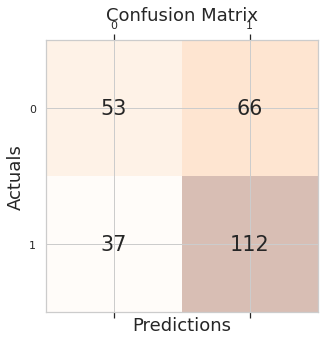

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
# predict_proba predicts the probability and predict just predicts the category
# y_pred = dt.predict_proba(X_test)[:, 1]
y_pred = dt.predict(X_test)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
# Read this as a percentage - What proportion of positive identifications was actually correct?
print('Precision: %.3f' % precision_score(y_test, y_pred))

Precision: 0.629


In [ ]:
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.752


In [ ]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.616


In [ ]:
# This is just for the TRUE --- Not the False
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

F1 Score: 0.685


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.45      0.51       119
           1       0.63      0.75      0.69       149

    accuracy                           0.62       268
   macro avg       0.61      0.60      0.60       268
weighted avg       0.61      0.62      0.61       268



In [ ]:
# Same info can be found in the score report
# Be ver careful about the data types. predict_proba returns a float
# predict returns a different data type
from sklearn.metrics import f1_score
y_pred = dt.predict_proba(X_test)[:, 1]
y_pred = y_pred.astype('int')
f1_score(y_test, y_pred, average=None)

array([0.5047619, 0.6809816])

In [ ]:

# Take a look at the first 10 rows and compare the predictions.
pred_y = dt.predict(X_test)
print("The first 10 prediction {}".format(pred_y[:10].round(0)))
print("The real first 10 labels {}".format(y_test[:10]))

The first 10 prediction [1 1 1 1 1 0 0 0 0 1]
The real first 10 labels [1 0 1 0 0 1 1 0 0 0]


In [ ]:
# How to make predictions with brand new values
type(df_train_full.head(1))

pandas.core.frame.DataFrame

In [ ]:
# Use double brackets around the iloc to force it to return a pandas dataframe and not a series
# Then you can convert ANY record into a dictionary.
# This is important because when you want to make a prediction - it must be in this format
df_train_full.iloc[[21]]

,gp,min,pts,fgm,fga,3p_made,3pa,ftm,fta,oreb,dreb,reb,ast,stl,blk,tov
661,26,12.2,2.8,1.1,2.8,0.6,1.5,0.1,0.2,0.3,0.8,1.0,1.0,0.4,0.3,0.6


In [ ]:
# How to convert any pandas row into a dictionary... needed for predictions
df_train_full.iloc[[21]].to_dict('records')[0]

{'gp': 26,
 'min': 12.2,
 'pts': 2.8,
 'fgm': 1.1,
 'fga': 2.8,
 '3p_made': 0.6,
 '3pa': 1.5,
 'ftm': 0.1,
 'fta': 0.2,
 'oreb': 0.3,
 'dreb': 0.8,
 'reb': 1.0,
 'ast': 1.0,
 'stl': 0.4,
 'blk': 0.3,
 'tov': 0.6}

In [ ]:
#item = df_train.head(1).to_dict('records')[0]
item = df_train_full.iloc[[21]].to_dict('records')[0]
actual = y_train[[21]]

In [ ]:
# The item to be predicted is passed in.  
def model_prediction(item, dv, model):
    X = dv.transform([item])
    y_pred = model.predict(X)
    return y_pred[0]

In [ ]:
# The item to be predicted is passed in.  
def model_prediction_proba(item, dv, model):
    X = dv.transform([item])
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred[0]

In [ ]:
model_prediction(item,dv,dt)

0

In [ ]:
model_prediction_proba(item,dv,dt)

0.0

In [ ]:
actual

array([0])

In [ ]:
# How to convert any pandas row into a dictionary... needed for predictions
# This will give you a template that you can manipulate to create predictions with new values
df_train_full.iloc[[2]].to_dict('records')[0]

{'gp': 77,
 'min': 29.4,
 'pts': 9.2,
 'fgm': 3.5,
 'fga': 8.3,
 '3p_made': 0.8,
 '3pa': 2.5,
 'ftm': 1.4,
 'fta': 2.1,
 'oreb': 0.4,
 'dreb': 2.1,
 'reb': 2.6,
 'ast': 4.3,
 'stl': 1.2,
 'blk': 0.1,
 'tov': 2.0}

In [ ]:
myItem = {'seniority': [2],
 'home': [5],
 'time': [3],
 'age': [39],
 'marital': [2],
 'records': [1],
 'job': [1],
 'expenses': [35],
 'income': [162.0],
 'assets': [4.0],
 'debt': [10000000.0],
 'amount': [40000000],
 'price': [57000000]}

In [ ]:
newDF = pd.DataFrame.from_dict(myItem)

In [ ]:
item = newDF.to_dict('records')[0]

In [ ]:
model_prediction(item,dv,dt)

0

In [ ]:
# Hyperparamter tuning

In [ ]:
# Look at the model parameters.   You can tune these.
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
# Look at the model parameters.   You can tune these.
dt.get_params()
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'min_samples_leaf': [20, 3],'max_depth': [4,6,8],'min_samples_split': [2,4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [20, 3],
                         'min_samples_split': [2, 4]},
             verbose=1)

In [ ]:
grid_search_cv.best_estimator_    # this will output the best values for the hyperparameters

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, random_state=42)

In [ ]:
# Let's assume that the decision tree is the one we want to explore
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, random_state=42)

In [ ]:
from sklearn.metrics import f1_score
y_pred = dt.predict_proba(X_test)[:, 1]
y_pred = y_pred.astype('int')
f1_score(y_test, y_pred, average=None)

array([0.61498708, 0.        ])

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz( 
 grid_search_cv.best_estimator_,
 out_file=('tree.dot'),
 feature_names=dv.get_feature_names(),
 class_names=None,
 filled=True,
)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
!pip install pydot
import pydot

(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Sentiment Analysis

In [ ]:
!pip install tweepy
!pip install tweepy --upgrade
!pip install better_profanity

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 101 kB 3.3 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: tweepy
    Found existing installation: tweepy 3.10.0
    Uninstalling tweepy-3.10.0:
      Successfully uninstalled tweepy-3.10.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 2.3 MB/s 


In [ ]:
# Install and import librairies and depencies 
!pip install tweepy
!pip install tweepy --upgrade
!pip install better_profanity
import tweepy
client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAADRyiwEAAAAAVyAignb%2BpcKAU5rCs%2BAI5Q45Vyk%3DIC8kWmSHu9dkNW8j2PGBs2DpSkMiKmBFkoE7S6WcaprBHhIfil')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re 

import numpy as np

import tweepy 

from tweepy import OAuthHandler 

from textblob import TextBlob 

import matplotlib.pyplot as plt

import pandas as pd

from wordcloud import WordCloud

from better_profanity import profanity

In [ ]:
#client = tweepy.Client(bearer_token=bearer_token)

In [ ]:
search_term = "nba rookie"
query = search_term + ' -is:retweet'

# get tweets from the API
tweets = client.search_recent_tweets(query=query,
                                     tweet_fields = ["created_at", "text", "source"],
                                     user_fields = ["name", "username", "location", "verified", "description"],
                                     max_results = 100,
                                     expansions='author_id'
                                     )

In [ ]:
# import the pandas library
import pandas as pd
# create a list of records
tweet_info_ls = []
# iterate over each tweet and corresponding user details
for tweet, user in zip(tweets.data, tweets.includes['users']):
    tweet_info = {
        'created_at': tweet.created_at,
        'text': tweet.text,
        'source': tweet.source,
        'name': user.name,
        'username': user.username,
        'location': user.location,
        'verified': user.verified,
        'description': user.description
    }
    tweet_info_ls.append(tweet_info)
# create dataframe from the extracted records
tweets_df = pd.DataFrame(tweet_info_ls)
# display the dataframe
tweets_df.head()

,created_at,text,source,name,username,location,verified,description
0,2022-11-27 05:27:03+00:00,2020 21 Chronicles NBA DESMOND #ad #basketbal...,cards-app,Hoops Cards Daily,hoopscardsdaily,None,False,Tweeting Our Partner's Basketball Card Auction...
1,2022-11-27 05:26:32+00:00,2 2022 PAOLO BANCHERO GOLD LIGHTNING #whodoyo...,Twitter,Cardboard Feed ⚡️,CardboardFeed,None,False,Follow Our Daily Trading Card Feed | Commissio...
2,2022-11-27 05:25:48+00:00,@nick_till32 And that was in the first half of...,Twitter for iPhone,🇵🇷🌺,bcua510,"Bay Area, CA",False,Boricua 🇵🇷 | Mother to 2 boys | Wifey 💍 | Spor...
3,2022-11-27 05:24:44+00:00,2012 Nikola Vucevic Rookie card auto #thehobb...,Twitter,League Cards 🏀,League_Cards,"Florida, USA",False,Basketball Card Feed | Scroll the Collection |...
4,2022-11-27 05:21:23+00:00,2021 22 Panini Prizm NBA 75th A #ad #basketbal...,cards-app,jay.metz82,JMetz82,None,False,TS: JRiggz


In [ ]:
# import the pandas library
import pandas as pd
# create a list of records
tweet_info_ls = []
# iterate over each tweet and corresponding user details
for tweet, user in zip(tweets.data, tweets.includes['users']):
    tweet_info = {
        'text': tweet.text,
        'username': user.username,
        'location': user.location,
    }
    tweet_info_ls.append(tweet_info)
# create dataframe from the extracted records
tweets_df = pd.DataFrame(tweet_info_ls)
# display the dataframe
tweets_df.head()

,text,username,location
0,2020 21 Chronicles NBA DESMOND #ad #basketbal...,hoopscardsdaily,None
1,2 2022 PAOLO BANCHERO GOLD LIGHTNING #whodoyo...,CardboardFeed,None
2,@nick_till32 And that was in the first half of...,bcua510,"Bay Area, CA"
3,2012 Nikola Vucevic Rookie card auto #thehobb...,League_Cards,"Florida, USA"
4,2021 22 Panini Prizm NBA 75th A #ad #basketbal...,JMetz82,None


In [ ]:
# Create a function to clean the tweets. Remove profanity, unnecessary characters, spaces, and stopwords.

def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    r = tweet.lower()
    r = profanity.censor(r)
    r = re.sub("'", "", r) # This is to avoid removing contractions in english
    r = re.sub("@[A-Za-z0-9_]+","", r)
    r = re.sub("#[A-Za-z0-9_]+","", r)
    r = re.sub(r'http\S+', '', r)
    r = re.sub('[()!?]', ' ', r)
    r = re.sub('\[.*?\]',' ', r)
    r = re.sub("[^a-z0-9]"," ", r)
    r = r.split()
    stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]
    r = [w for w in r if not w in stopwords]
    r = " ".join(word for word in r)
    return r

In [ ]:
tweet_list = tweets_df.text.to_list()

In [ ]:
cleaned = [clean_tweet(tw) for tw in tweet_list]
cleaned

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


['2020 21 chronicles nba desmond',
 '2 2022 paolo banchero gold lightning',
 'that was first half his rookie season before he ever really had any nba run',
 '2012 nikola vucevic rookie card auto',
 '2021 22 panini prizm nba 75th',
 '2021 22 panini nba prizm cade cunning',
 'i felt rookies would hold value ts i own like 4 rares but have 2021 draft picks 1 14 3 badge rookies tbey still tanked once second moment comes out fact it s rookie means almost nothing because it lost its utility',
 '2021 22 panini nba prizm silver',
 '21 22 panini one one nba br',
 'nah bruh y all be acting like he not old as playing nba 19 seasons all his organization relying him since he was rookie playing heavy minutes consistently amp perform at high level improving every season i think we can talk age when i comes bron now',
 'jaylen brown rookie replay 2016 rc boston celtics generation next',
 '2012 13 panini nba hoops jimmy butler',
 '2020 21 nba hoops james wiseman rc rookie golden state warriors official 

In [ ]:
# Define the sentiment objects using TextBlob

sentiment_objects = [TextBlob(tweet) for tweet in cleaned]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.0, TextBlob("2020 21 chronicles nba desmond"))

In [ ]:
# Create a list of polarity values and tweet text

sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

# Print the value of the 0th row.

sentiment_values[0]
# Print all the sentiment values

sentiment_values[0:99]

[[0.0, '2020 21 chronicles nba desmond'],
 [0.0, '2 2022 paolo banchero gold lightning'],
 [0.09444444444444444,
  'that was first half his rookie season before he ever really had any nba run'],
 [0.0, '2012 nikola vucevic rookie card auto'],
 [0.0, '2021 22 panini prizm nba 75th'],
 [0.0, '2021 22 panini nba prizm cade cunning'],
 [0.3,
  'i felt rookies would hold value ts i own like 4 rares but have 2021 draft picks 1 14 3 badge rookies tbey still tanked once second moment comes out fact it s rookie means almost nothing because it lost its utility'],
 [0.0, '2021 22 panini nba prizm silver'],
 [0.0, '21 22 panini one one nba br'],
 [0.032,
  'nah bruh y all be acting like he not old as playing nba 19 seasons all his organization relying him since he was rookie playing heavy minutes consistently amp perform at high level improving every season i think we can talk age when i comes bron now'],
 [0.0, 'jaylen brown rookie replay 2016 rc boston celtics generation next'],
 [0.0, '2012 13 

In [ ]:
# Create a dataframe of each tweet against its polarity

sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df

,polarity,tweet
0,0.000000,2020 21 chronicles nba desmond
1,0.000000,2 2022 paolo banchero gold lightning
2,0.094444,that was first half his rookie season before h...
3,0.000000,2012 nikola vucevic rookie card auto
4,0.000000,2021 22 panini prizm nba 75th
5,0.000000,2021 22 panini nba prizm cade cunning
6,0.300000,i felt rookies would hold value ts i own like ...
7,0.000000,2021 22 panini nba prizm silver
8,0.000000,21 22 panini one one nba br
9,0.032000,nah bruh y all be acting like he not old as pl...


In [ ]:
# Save the polarity column as 'n'.

n=sentiment_df["polarity"]

# Convert this column into a series, 'm'. 

m=pd.Series(n)

m

0     0.000000
1     0.000000
2     0.094444
3     0.000000
4     0.000000
5     0.000000
6     0.300000
7     0.000000
8     0.000000
9     0.032000
10    0.000000
11    0.000000
12    0.300000
13    0.300000
14    0.300000
15    0.300000
16    0.300000
17    0.300000
18    0.500000
19    0.000000
20    0.250000
21    0.000000
22    0.000000
23    0.000000
24    0.000000
25    0.050000
26    0.050000
27    0.050000
Name: polarity, dtype: float64

In [ ]:
# Initialize variables, 'pos', 'neg', 'neu'.

pos=0
neg=0
neu=0

# Create a loop to classify the tweets as Positive, Negative, or Neutral.
# Count the number of each.

for items in m:
    if items>0:
        print("Positive")
        pos=pos+1
    elif items<0:
        print("Negative")
        neg=neg+1
    else:
        print("Neutral")
        neu=neu+1
        
print(pos,neg,neu)

Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Positive
Neutral
Neutral
Positive
Neutral
Neutral
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Positive
Positive
Positive
14 0 14


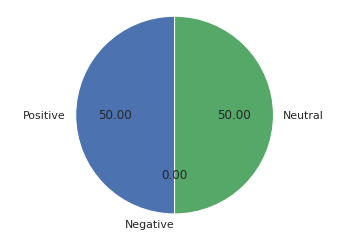

In [ ]:
pieLabels=["Positive","Negative","Neutral"]

populationShare=[pos,neg,neu]

figureObject, axesObject = plt.subplots()

axesObject.pie(populationShare,labels=pieLabels,autopct='%1.2f',startangle=90)

axesObject.axis('equal')

plt.show()

In [ ]:
# Display the number of twitter users who feel a certain way about the given topic.

print("%f percent of twitter users feel positive about %s"%(pos,query))

print("%f percent of twitter users feel negative about %s"%(neg,query))

print("%f percent of twitter users feel neutral about %s"%(neu,query))

14.000000 percent of twitter users feel positive about nba rookie -is:retweet
0.000000 percent of twitter users feel negative about nba rookie -is:retweet
14.000000 percent of twitter users feel neutral about nba rookie -is:retweet


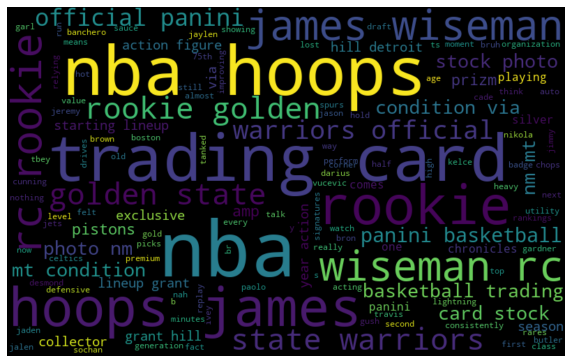

In [ ]:
# Create a Wordcloud from the tweets

all_words = ' '.join([text for text in cleaned])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()